# Análise e Insights dos Agrupamentos

Este notebook teve como objetivo realizar uma análise descritiva dos clusters gerados nos notebooks anteriores. A análise foi feita a partir da média das variáveis dentro de cada cluster, a fim de identificar padrões e possíveis perfis de clientes. Durante essa etapa, observamos que os grupos eram muito semelhantes em relação a características como idade, lucro e valor investido, sem uma distinção clara entre eles.

Foi neste ponto que percebi que a falta de um escopo de produto bem definido prejudicou a utilidade dos agrupamentos. Sem uma pergunta de negócio clara, os padrões encontrados não forneceram insights acionáveis para a definição de um novo produto de investimento. Esse aprendizado foi fundamental, pois destacou a importância de ter um escopo claro e um objetivo bem definido antes de realizar a análise de clustering.


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv ('~/Documents/banking-customer-clustering/clientes_agrupados.csv')
df.head()

,Branch_ID,City_x,Region_x,Firm_Revenue,Expenses,Profit_Margin,Customer_ID,Age,Customer_Type,City_y,...,Transaction_Amount,Investment_Amount,Investment_Type,Transaction_Date,Month,transaction_dayofweek,transaction_day,is_weekend,days_since_first_tx,cluster
0,1000,Solapur,East,422443.0,346471,56.31,204700,54.0,Individual,Kolhapur,...,4676.0,11260,Fixed Deposit,2024-04-05,2024-04,4,5,0,746,0
1,1000,Solapur,East,422443.0,346471,56.31,204955,51.0,Business,Solapur,...,1121.0,27750,Fixed Deposit,2024-05-29,2024-05,2,29,0,800,0
2,1000,Solapur,East,422443.0,346471,56.31,205772,57.0,Individual,Nashik,...,2924.0,9480,Recurring Deposit,2025-02-14,2025-02,4,14,0,1061,0
3,1000,Solapur,East,422443.0,346471,56.31,205772,57.0,Individual,Nashik,...,780.0,8956,Fixed Deposit,2022-11-07,2022-11,0,7,0,231,0
4,1000,Solapur,East,422443.0,346471,56.31,205772,57.0,Individual,Nashik,...,3988.0,19907,Mutual Fund,2023-05-03,2023-05,2,3,0,408,0


In [27]:
df.columns

Index(['Branch_ID', 'City_x', 'Region_x', 'Firm_Revenue', 'Expenses',
       'Profit_Margin', 'Customer_ID', 'Age', 'Customer_Type', 'City_y',
       'Region_y', 'Bank_Name', 'Transaction_ID', 'Account_Type',
       'Total_Balance', 'Transaction_Amount', 'Investment_Amount',
       'Investment_Type', 'Transaction_Date', 'Month', 'transaction_dayofweek',
       'transaction_day', 'is_weekend', 'days_since_first_tx', 'cluster'],
      dtype='object')

C:\Users\bianc\AppData\Local\Temp\ipykernel_14832\1753263842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='Set2')


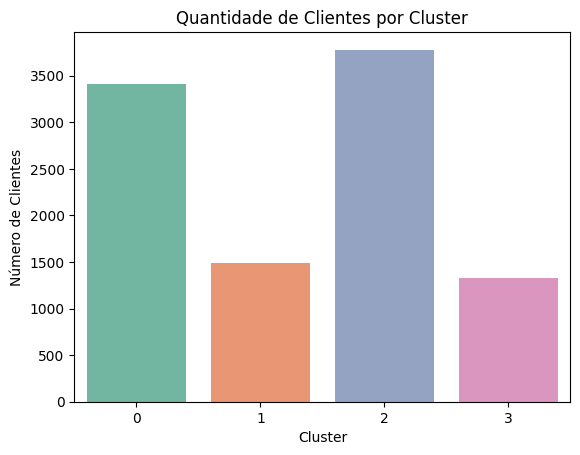

In [12]:
#Tamanho de cada cluster
sns.countplot(x='cluster', data=df, palette='Set2')
plt.title('Quantidade de Clientes por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')
plt.show()


In [14]:
df.groupby('cluster')[['Age', 'Transaction_Amount', 'Investment_Amount', 'Profit_Margin']].mean()


,Age,Transaction_Amount,Investment_Amount,Profit_Margin
cluster,,,,
0,48.941727,2557.243648,25230.623278,23.867095
1,49.346341,2524.889584,25531.527946,24.918343
2,48.803890,2560.376436,25867.865802,24.071887
3,49.973387,2474.931575,25488.470588,23.380581


C:\Users\bianc\AppData\Local\Temp\ipykernel_14832\47995432.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y='Age', data=df, ci=None, palette='pastel')
C:\Users\bianc\AppData\Local\Temp\ipykernel_14832\47995432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='Age', data=df, ci=None, palette='pastel')


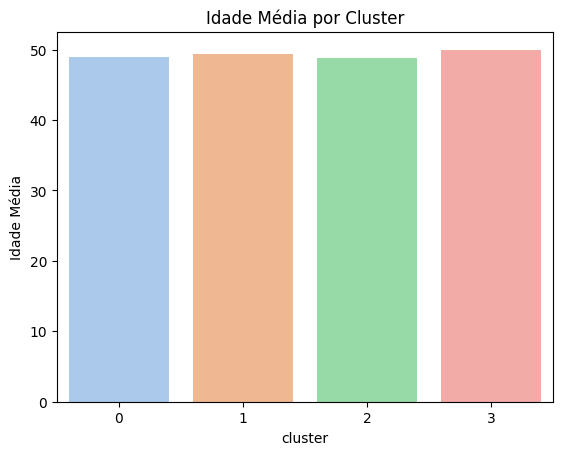

In [13]:
# Média de idade por cluster

sns.barplot(x='cluster', y='Age', data=df, ci=None, palette='pastel')
plt.title('Idade Média por Cluster')
plt.ylabel('Idade Média')
plt.show()

C:\Users\bianc\AppData\Local\Temp\ipykernel_14832\2567134558.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y='Investment_Amount', data=df, ci=None, palette='Blues')
C:\Users\bianc\AppData\Local\Temp\ipykernel_14832\2567134558.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='Investment_Amount', data=df, ci=None, palette='Blues')


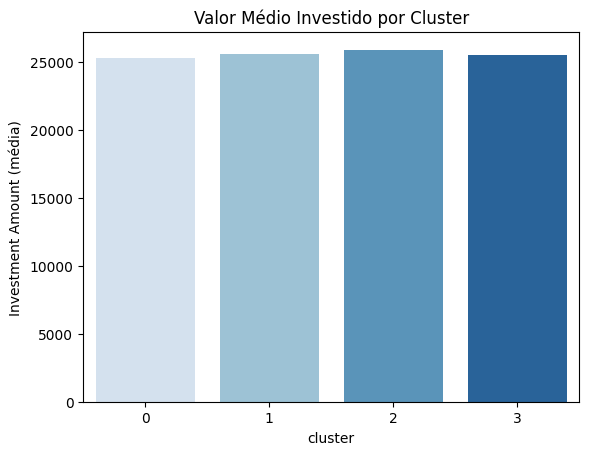

In [15]:
# Valor médio de investimento

sns.barplot(x='cluster', y='Investment_Amount', data=df, ci=None, palette='Blues')
plt.title('Valor Médio Investido por Cluster')
plt.ylabel('Investment Amount (média)')
plt.show()


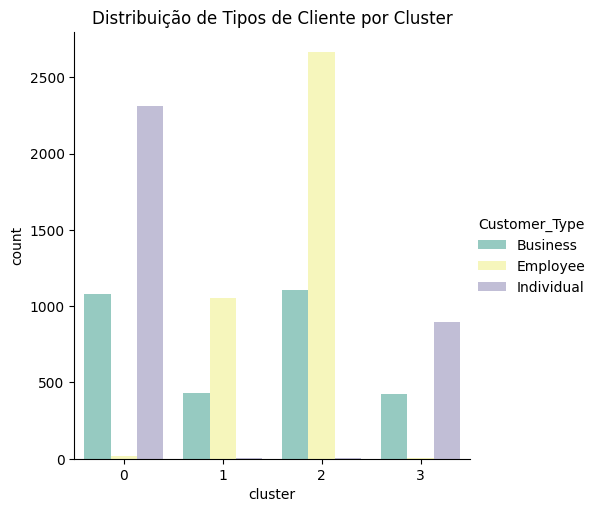

In [17]:
#Distribuição de Tipos de Cliente por Clusterc
cliente_tipo = df.groupby(['cluster', 'Customer_Type']).size().reset_index(name='count')
sns.catplot(data=cliente_tipo, x='cluster', y='count', hue='Customer_Type', kind='bar', palette='Set3')
plt.title('Distribuição de Tipos de Cliente por Cluster')
plt.show()


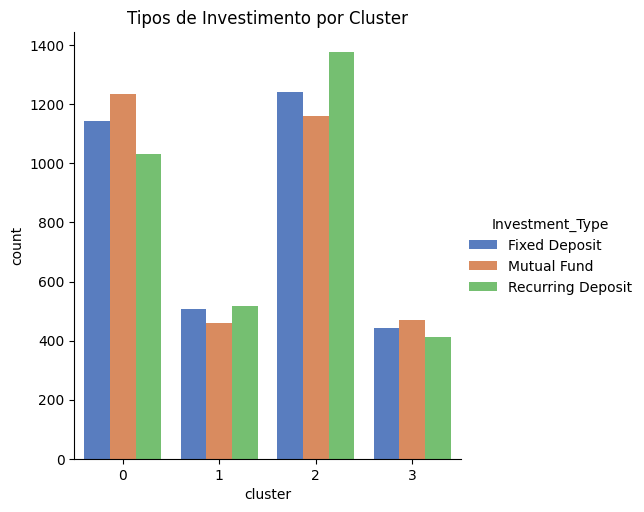

In [18]:
#Tipos de Investimento por Cluster

investimento_tipo = df.groupby(['cluster', 'Investment_Type']).size().reset_index(name='count')
sns.catplot(data=investimento_tipo, x='cluster', y='count', hue='Investment_Type', kind='bar', palette='muted')
plt.title('Tipos de Investimento por Cluster')
plt.show()


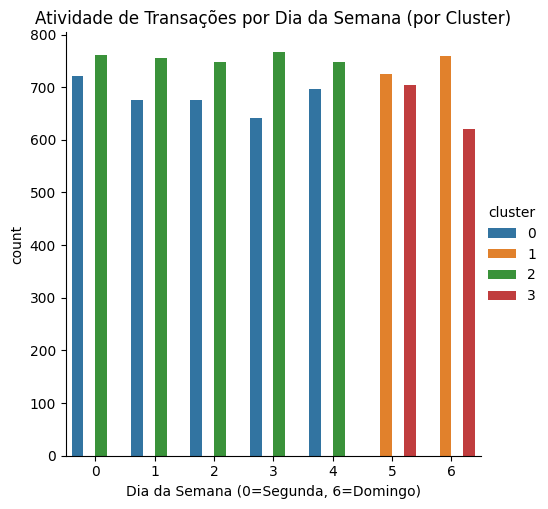

In [19]:
#Atividade de Transações por Dia da Semana (por Cluster)

dias = df.groupby(['cluster', 'transaction_dayofweek']).size().reset_index(name='count')
sns.catplot(data=dias, x='transaction_dayofweek', y='count', hue='cluster', kind='bar', palette='tab10')
plt.title('Atividade de Transações por Dia da Semana (por Cluster)')
plt.xlabel('Dia da Semana (0=Segunda, 6=Domingo)')
plt.show()


In [25]:
# Médias relevantes por cluster
medias = df.groupby('cluster')[['Age', 'Transaction_Amount', 'Investment_Amount', 'Profit_Margin']].mean().round(2)

# Distribuição dos tipos de cliente por cluster
tipos_cliente = df.groupby(['cluster', 'Customer_Type']).size().unstack(fill_value=0)

# Cidade mais comum por cluster
cidade_mais_comum = df.groupby('cluster')['City_y'].agg(lambda x: x.value_counts().idxmax())

# Região mais comum por cluster
regiao_mais_comum = df.groupby('cluster')['Region_x'].agg(lambda x: x.value_counts().idxmax())

# Tipo de investimento mais comum por cluster
investimento_mais_comum = df.groupby('cluster')['Investment_Type'].agg(lambda x: x.value_counts().idxmax())

# Organiza tudo em um único dicionário para exibição
resumo_cluster = {
    'Médias por Cluster': medias,
    'Tipos de Cliente por Cluster': tipos_cliente,
    'Cidade mais Comum por Cluster': cidade_mais_comum,
    'Região mais Comum por Cluster': regiao_mais_comum,
    'Tipo de Investimento mais Comum por Cluster': investimento_mais_comum
}

# Exibir tudo
for titulo, conteudo in resumo_cluster.items():
    print(f'\n{"="*30}\n{titulo}\n{"="*30}')
    print(conteudo)


Médias por Cluster
           Age  Transaction_Amount  Investment_Amount  Profit_Margin
cluster                                                             
0        48.94             2557.24           25230.62          23.87
1        49.35             2524.89           25531.53          24.92
2        48.80             2560.38           25867.87          24.07
3        49.97             2474.93           25488.47          23.38

Tipos de Cliente por Cluster
Customer_Type  Business  Employee  Individual
cluster                                      
0                  1082        20        2309
1                   428      1055           2
2                  1108      2664           6
3                   424         8         894

Cidade mais Comum por Cluster
cluster
0    Mumbai
1    Mumbai
2    Mumbai
3    Mumbai
Name: City_y, dtype: object

Região mais Comum por Cluster
cluster
0    East
1    East
2    East
3    East
Name: Region_x, dtype: object

Tipo de Investimento mais Comum por

In [28]:
# Agrupar todas as variáveis importantes por cluster
perfil_completo = df.groupby('cluster').agg({
    'Age': ['mean', 'std'],
    'Firm_Revenue': 'mean',
    'Expenses': 'mean',
    'Profit_Margin': 'mean',
    'Transaction_Amount': 'mean',
    'Investment_Amount': 'mean',
    'Total_Balance': 'mean',
    'Investment_Type': lambda x: x.mode()[0],  # Mais comum
    'City_x': lambda x: x.mode()[0],  # Cidade mais comum
    'City_y': lambda x: x.mode()[0],  # Cidade mais comum
    'Customer_Type': lambda x: x.mode()[0],  # Tipo mais comum
    'is_weekend': 'mean',
    'days_since_first_tx': 'mean'
}).round(2)

print(perfil_completo)



           Age        Firm_Revenue   Expenses Profit_Margin  \
          mean    std         mean       mean          mean   
cluster                                                       
0        48.94  17.72    498663.40  263670.74         23.87   
1        49.35  17.68    522570.91  264939.57         24.92   
2        48.80  17.56    517211.73  271973.53         24.07   
3        49.97  17.63    489258.64  261285.93         23.38   

        Transaction_Amount Investment_Amount Total_Balance    Investment_Type  \
                      mean              mean          mean           <lambda>   
cluster                                                                         
0                  2557.24          25230.62      50086.42        Mutual Fund   
1                  2524.89          25531.53      49916.16  Recurring Deposit   
2                  2560.38          25867.87      50461.24  Recurring Deposit   
3                  2474.93          25488.47      50227.91        Mutual

In [29]:
# Frequência das variáveis categóricas por cluster
distribuicoes_categoricas = df.groupby('cluster')[['Customer_Type', 'Investment_Type', 'City_x', 'City_y', 'Region_x', 'Region_y', 'Account_Type']].apply(lambda x: x.value_counts()).unstack(fill_value=0)

print(distribuicoes_categoricas)


Account_Type                                                                 Business  \
cluster Customer_Type Investment_Type   City_x   City_y   Region_x Region_y             
0       Business      Fixed Deposit     Kolhapur Kolhapur East     North            2   
                                                          North    West             1   
                                                          South    East             0   
                                                          West     North            2   
                                                 Mumbai   East     East             1   
...                                                                               ...   
3       Individual    Recurring Deposit Solapur  Solapur  East     South            1   
                                                          North    East             0   
                                                          South    East             0   
                     

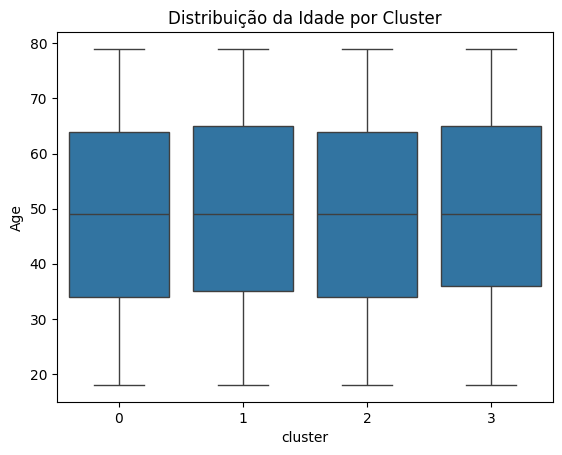

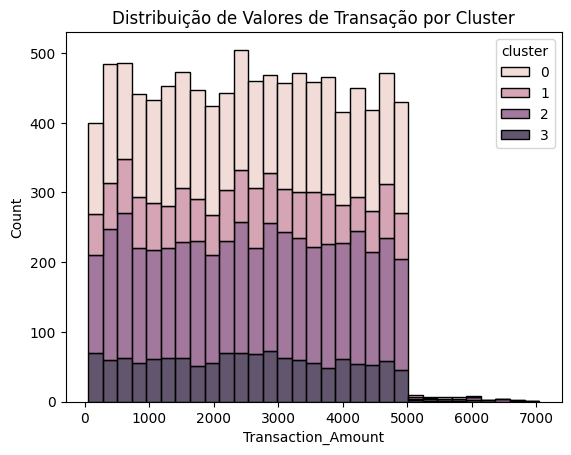

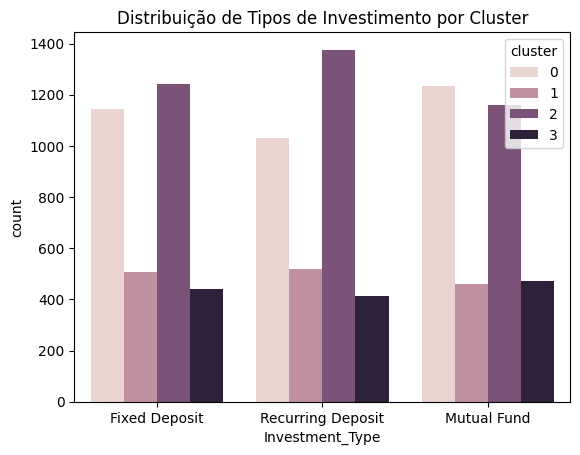

In [30]:
# Distribuição de idade por cluster
sns.boxplot(data=df, x='cluster', y='Age')
plt.title('Distribuição da Idade por Cluster')
plt.show()

# Histograma do valor de transação por cluster
sns.histplot(data=df, x='Transaction_Amount', hue='cluster', multiple='stack')
plt.title('Distribuição de Valores de Transação por Cluster')
plt.show()

# Frequência de tipos de investimentos
sns.countplot(data=df, x='Investment_Type', hue='cluster')
plt.title('Distribuição de Tipos de Investimento por Cluster')
plt.show()
